In [ ]:
#### Scrape wait times for Seattle DMV
#### Save wait times to a .csv file
### Callin Switzer
### 12 Sept 2017
## Python 3

In [7]:
from bs4 import BeautifulSoup

import requests

from datetime import datetime

import os.path
import os

import re

import time

In [8]:

url_dtw = "https://fortress.wa.gov/dol/dolprod/dsdoffices/OfficeInfo.aspx?cid=583&oid=24"
url_shl = 'https://fortress.wa.gov/dol/dolprod/dsdoffices/OfficeInfo.aspx?cid=594&oid=22'

def getWaitTimes():
    for ii in [url_dtw, url_shl]:
        page = requests.get(ii)

        if page.status_code == 200: 
            print("page status OK")

        # get soup
        soup = BeautifulSoup(page.content, 'html.parser')

        # find tag with waittime
        div = soup.find(id="ctl00_Main_waittime")

        ttime = list(div)[1]
        tme = list(ttime)[0].replace(" ", "").replace(".","")

        print(tme)

        todaysDate = datetime.today()
        datetime_object = datetime.strptime(str(todaysDate)[0:10] + " " +  tme, '%Y-%m-%d %I:%M%p')


        waitTime1 = list(div)[6]   

        waitTime = re.sub(",", "_", waitTime1)
        my_list = waitTime1.split(",")

        # get only numbers
        hourMins = [re.sub("[^0-9]", "", ff) for ff in my_list]

        if len(hourMins) > 1:
            mins = 60 * int(hourMins[0]) + int(hourMins[1])
        else: 
            mins = int(hourMins[0])

        print(mins)

        fname = '/Users/cswitzer/Desktop/waitTime.csv'


        if not os.path.isfile(fname):
            with open(fname,'w') as file:
                file.write("datetime_downtown" + "," + "waittime_downtown" + "," +  "mins_dtw" + "," 
                           + "dateTime_shoreline" + "," + "waitTime_shoreline" + "," + "mins_shl")
                file.write('\n')


        # write to .csv file
        with open(fname,'a') as file:
            file.write(str(datetime_object) + "," + str(waitTime) + "," + str(mins) + ",")
            print (str(datetime_object) + "," + str(waitTime))
            if ii == url_shl:
                file.write('\n')


In [30]:
for kk in range (10): 
    print(kk) 
    getWaitTimes()
    time.sleep(900)
    
os.system('say "Times up times up hurray keep it shred and of crunk"')

0
page status OK
1:35pm
61
2017-09-15 13:35:00,1 hour_ 1 minute
page status OK
1:35pm
51
2017-09-15 13:35:00,51 minutes
1
page status OK
1:50pm
64
2017-09-15 13:50:00,1 hour_ 4 minutes
page status OK
1:50pm
36
2017-09-15 13:50:00,36 minutes
2
page status OK
2:05pm
60
2017-09-15 14:05:00,1 hour_ 0 minutes
page status OK
2:05pm
29
2017-09-15 14:05:00,29 minutes
3
page status OK
2:20pm
45
2017-09-15 14:20:00,45 minutes
page status OK
2:20pm
28
2017-09-15 14:20:00,28 minutes
4
page status OK
2:35pm
48
2017-09-15 14:35:00,48 minutes
page status OK
2:35pm
27
2017-09-15 14:35:00,27 minutes
5
page status OK
2:50pm
58
2017-09-15 14:50:00,58 minutes
page status OK
2:50pm
26
2017-09-15 14:50:00,26 minutes
6
page status OK
3:05pm
64
2017-09-15 15:05:00,1 hour_ 4 minutes
page status OK
3:05pm
16
2017-09-15 15:05:00,16 minutes
7
page status OK
3:20pm
60
2017-09-15 15:20:00,1 hour_ 0 minutes
page status OK
3:20pm
16
2017-09-15 15:20:00,16 minutes
8
page status OK
3:35pm
48
2017-09-15 15:35:00,48 minu

0

In [ ]:
# getWaitTimes()

In [31]:
# read in file and plot wait times

import pandas as pd

In [32]:
wt = pd.read_csv('/Users/cswitzer/Desktop/waitTime.csv')

In [33]:
wt.head()

,dateTime_dtn,waitTime_dtn,mins_dtn,datetime_shl,waittime_shl,mins_shl
0,9/12/17 10:42,48 minutes,48,9/12/17 10:42,1 hour_ 24 minutes,84
1,9/12/17 10:43,48 minutes,48,9/12/17 10:43,1 hour_ 24 minutes,84
2,9/12/17 10:46,50 minutes,50,9/12/17 10:46,1 hour_ 25 minutes,85
3,9/12/17 10:47,51 minutes,51,9/12/17 10:47,1 hour_ 22 minutes,82
4,9/12/17 10:48,52 minutes,52,9/12/17 10:48,1 hour_ 24 minutes,84


In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime


In [35]:
tms_dtn = [datetime.strptime(xx, "%m/%d/%y %H:%M") for xx in wt.dateTime_dtn]
tms_shl = [datetime.strptime(xx, "%m/%d/%y %H:%M") for xx in wt.datetime_shl]

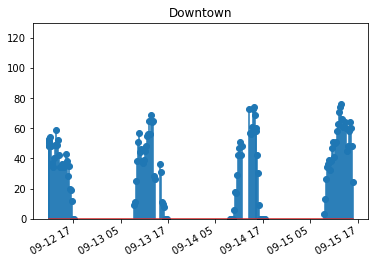

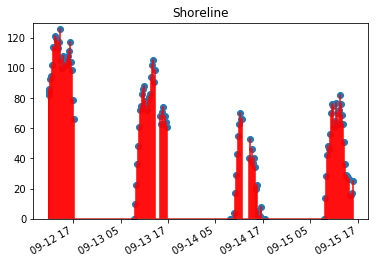

In [36]:
plt.stem(tms_dtn, wt.mins_dtn)
plt.gcf().autofmt_xdate()
plt.ylim([0, 130])
plt.title("Downtown")
plt.show()

plt.stem(tms_dtn, wt.mins_shl, "r")
plt.gcf().autofmt_xdate()
plt.ylim([0, 130])
plt.title("Shoreline")
plt.show()